Questão 1

C:\Users\vinic\AppData\Local\Temp\ipykernel_20248\279107943.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='tipo_hd', y='latencia_ms', data=df, palette='Set1')


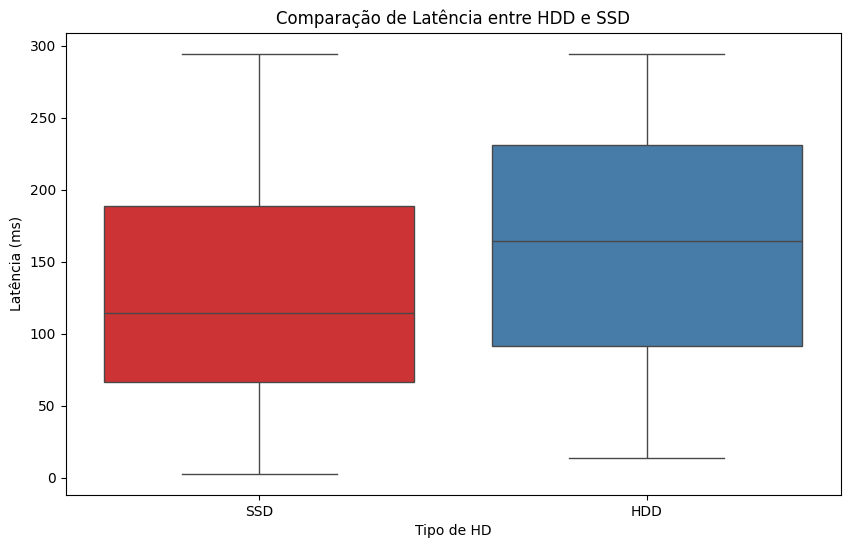

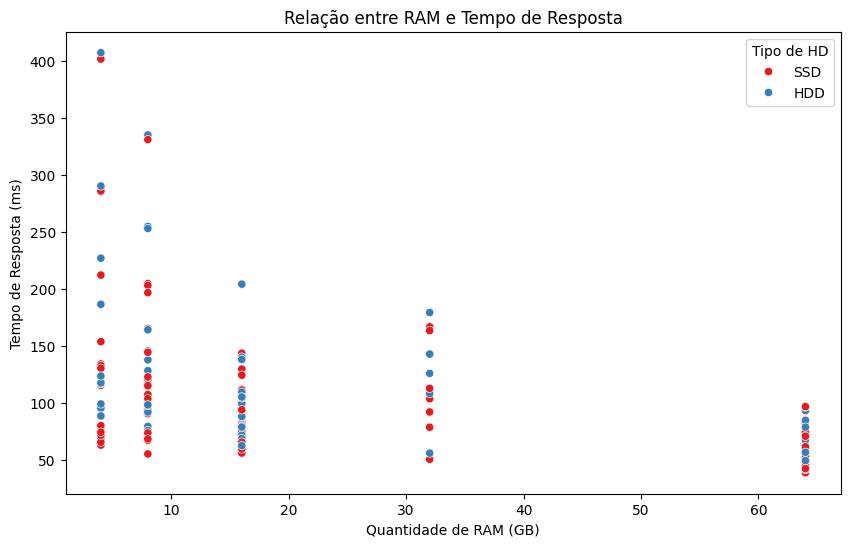

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import patsy as psy
import statsmodels.api as sm


file_path = "./dataset_22.csv"
df = pd.read_csv(file_path)

plt.figure(figsize=(10, 6))

# Comparação de latência entre HDD e SSD
sns.boxplot(x='tipo_hd', y='latencia_ms', data=df, palette='Set1')

plt.title('Comparação de Latência entre HDD e SSD')
plt.xlabel('Tipo de HD')
plt.ylabel('Latência (ms)')
plt.show()

# Análise da relação entre quantidade de RAM e tempo de resposta
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ram_gb', y='tempo_resposta', palette='Set1', data=df, hue='tipo_hd')
plt.title('Relação entre RAM e Tempo de Resposta')
plt.xlabel('Quantidade de RAM (GB)')
plt.ylabel('Tempo de Resposta (ms)')
plt.legend(title='Tipo de HD')
plt.show()

#Gráfico Boxplot - Latência entre HDD e SSD
Os SSDs apresentam latência menor e mais estável, com mediana visivelmente inferior à dos HDDs. Já os HDDs têm latência mais alta e variada, indicando desempenho inferior. Isso confirma que o tipo de armazenamento tem impacto direto na velocidade de resposta.

# Gráfico de Dispersão – RAM vs Tempo de Resposta
O tempo de resposta tende a ser ligeiramente menor em sistemas com SSD, o que indica uma certa vantagem desse tipo de armazenamento. No entanto, a variação dentro dos grupos ainda é alta, o que mostra que nem o SSD garante consistência, e que a quantidade de RAM sozinha também não explica as diferenças de desempenho. A influência de outros fatores, como processador e configuração geral do sistema, continua relevante.

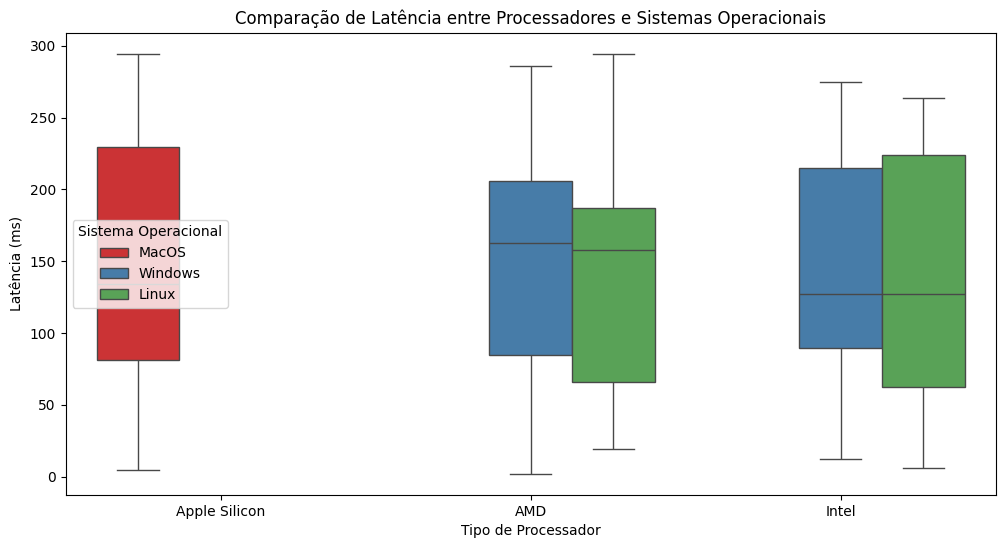

In [13]:
# Criar um gráfico de boxplot para comparar latência entre processadores e sistemas operacionais
plt.figure(figsize=(12, 6))

# Usar o gráfico de boxplot para mostrar a latência entre tipos de processadores e sistemas operacionais
sns.boxplot(x='tipo_processador', y='latencia_ms', hue='sistema_operacional', data=df, palette='Set1')

plt.title('Comparação de Latência entre Processadores e Sistemas Operacionais')
plt.xlabel('Tipo de Processador')
plt.ylabel('Latência (ms)')
plt.legend(title='Sistema Operacional')
plt.show()

ETAPA II

In [ ]:
df_clean = df.dropna(subset=[
    'tempo_resposta', 'cpu_cores', 'ram_gb', 'latencia_ms', 'armazenamento_tb',
    'sistema_operacional', 'tipo_hd', 'tipo_processador'
])

#FORMULA DO MODELO
formula = 'tempo_resposta ~ cpu_cores + ram_gb + latencia_ms + armazenamento_tb + C(sistema_operacional) + C(tipo_hd) + C(tipo_processador)'

y, X = psy.dmatrices(formula, data=df_clean, return_type='dataframe')

# Ajustar o modelo
modelo = sm.OLS(y, X).fit()

# Exibir o resumo do modelo
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:         tempo_resposta   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     33.08
Date:                Wed, 30 Apr 2025   Prob (F-statistic):           6.94e-28
Time:                        18:41:14   Log-Likelihood:                -700.06
No. Observations:                 139   AIC:                             1418.
Df Residuals:                     130   BIC:                             1445.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Intercepto e Coeficientes:
- Intercepto: 239.9116
- C(sistema_operacional)[T.MacOS]	-0.6772
- C(sistema_operacional)[T.Windows]	13.0119
- C(tipo_hd)[T.SSD]	0.3598
- C(tipo_processador)[T.Apple Silicon]	-0.6772
- C(tipo_processador)[T.Intel]	-10.2334
- cpu_cores	-12.0201
- ram_gb	-1.1836
- latencia_ms	0.0025
- armazenamento_tb	-4.3444

Valor de R² e R² Ajustado:
- R²: 0.671
- R² Ajustado: 0.650

Valores de Testes:  
Teste F – Avaliação Global do Modelo
- F-statistic: 33,08
- p-valor do F: 6,94 × 10**-28

Testes t – Avaliação Individual dos Coeficientes  
Cada coeficiente foi testado individualmente com base na estatística t e seu p-valor (P>|t|). Abaixo, os principais resultados:
- cpu_cores	-13,56	< 0,001	Significativo: mais núcleos reduzem o tempo de resposta
- ram_gb	-8,26	< 0,001	Significativo: mais RAM reduz o tempo de resposta
- latencia_ms	0,06	0,951	Não significativo
- armazenamento_tb	-0,83	0,409	Não significativo
- tipo_hd = SSD	0,05	0,959	Não significativo
- sistema_operacional = Windows	1,59	0,115	Não significativo
- tipo_processador = Intel	-1,21	0,227	Não significativo